# **C3 - Patrones geneticos**

**Autores:**  

* Esteban Rodriguez
* Daniel Velasquez
* Santiago Niño

Ciencias de la computación e Inteligencia Artificial


Vida Artificial

# __Bibliotecas usadas__

In [19]:
%pip install numpy
%pip install matplotlib
%pip install requests
%pip install PIL
%pip install IPython

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import requests
from PIL import Image
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import copy
from IPython import display

# Clases

## Constantes

In [21]:
class constantes:
    N_cantidad_cromosomas = 100
    cantidad_individuos = 50
    num_max_generaciones = 500
    prob_mutacion = 0.1
    prob_cruce = 0.97
    n_seleccionados = 20

## Individuo

In [22]:
class individuo:
    def __init__(self, cromosoma, fitness):
        self._cromosoma = cromosoma
        self.fitness = fitness
        self.value = self._calculate_fitness(self._cromosoma)

    def _calculate_fitness(self, value):
        return self.fitness(value)

    @property
    def cromosoma(self):
        return self._cromosoma

    @cromosoma.setter
    def cromosoma(self, value):
        self._cromosoma = value
        self.value = self._calculate_fitness(value)

## OperadorGenetico

In [23]:
class OperadorGenetico:
    def __init__(self, poblacion, tipo, prob_cruce=0.5, prob_mutacion=0.5):
      self.poblacion = poblacion
      self.tipo = tipo
      self.prob_cruce = prob_cruce
      self.prob_mutacion = prob_mutacion

    def opcion(self):
      #metodos seleccion
      if self.tipo == 'ruleta' or self.tipo == 'estocastico' or self.tipo == 'ranking' or self.tipo == 'torneo':
        return self.seleccion()
      #metodos cruce
      if self.tipo == 'basado_punto' or self.tipo == 'basado_dos_puntos' or self.tipo == 'uniforme':
        return self.cruce()
      #metodos mutacion
      if self.tipo == 'flit_bit' or self.tipo == 'inversion_mutation' or self.tipo == 'inversion_mutation' or self.tipo == 'scramble':
        return self.mutacion()

    def seleccion(self):
      if self.tipo == "ruleta":
        next_generation = []
        total_fitness = np.sum([indiv.value for indiv in self.poblacion])
        probabilidades = [indiv.value / total_fitness for indiv in self.poblacion]
        while len(next_generation) <= len(self.poblacion):
            individuo_ruleta = np.random.choice(a=self.poblacion, size=1, replace=True, p=probabilidades)
            next_generation.append(individuo_ruleta[0])
        return next_generation

      elif self.tipo == "estocastico":
        next_generation = []
        if len(self.population) == 1:
            return self.population[0]
        total_fitness = np.sum([indiv.value for indiv in self.poblacion])
        probabilidades = [indiv.value / total_fitness for indiv in self.poblacion]
        while len(next_generation) <= len(self.poblacion) - 1:
            if sum(probabilidades) < 1:
                probabilidades[-1] += 1 - sum(probabilidades)
            r = np.random.random()
            c = probabilidades[0]
            i = 0
            while c < r:
                i += 1
                c += probabilidades[i]
            next_generation.append(self.poblacion[i])
        return next_generation

      elif self.tipo == "ranking":
        next_generation = []
        ordenando = np.argsort([indiv.value for indiv in self.poblacion]) + 1
        rangos = np.argsort(ordenando) + 1
        seleccion_rango = rangos / np.sum(rangos)
        while len(next_generation) <= len(self.poblacion):
            #print(len(next_generation), " - " , len(self.poblacion))
            individuo_rango = np.random.choice(a=self.poblacion, size=1, replace=True, p=list(seleccion_rango))
            next_generation.append(individuo_rango[0])
        return next_generation

      elif self.tipo == "torneo":
        next_generation = []
        while len(next_generation) <= len(self.poblacion):
            for individuo in self.poblacion:
                participantes = np.random.choice(a=self.poblacion, size=3, replace=True)
                campeon = max(participantes, key=lambda ind: individuo.value)
                next_generation.append(campeon)
        return next_generation

    def cruce(self):
      if self.tipo == "basado_punto":
        next_generation = []
        while len(next_generation) < len(self.poblacion):
            x = np.random.randint(len(self.poblacion))
            y = np.random.randint(len(self.poblacion))
            if x == y:
                while x == y:
                    y = np.random.randint(len(self.poblacion))
            p1 = self.poblacion[x]
            p2 = self.poblacion[y]
            padre1 = p1.cromosoma
            padre2 = p2.cromosoma
            n = np.random.randint(len(padre1))
            aux = np.array([padre1[:n]])
            aux2 = np.array([padre2[:n]])
            auxpadre1 = np.array([padre1[n:]])
            auxpadre2 = np.array([padre2[n:]])
            next_generation.append(individuo(np.concatenate((aux, auxpadre2), axis=None), p1.fitness))
            next_generation.append(individuo(np.concatenate((aux2, auxpadre1), axis=None), p2.fitness))
        return next_generation

      if self.tipo == 'basado_dos_puntos':
        next_generation = []
        while len(next_generation) <= len(self.poblacion):
            x = np.random.randint(len(self.poblacion))
            y = np.random.randint(len(self.poblacion))
            p1 = self.poblacion[x]
            p2 = self.poblacion[y]
            padre1 = p1.cromosoma
            padre2 = p2.cromosoma
            n = np.random.randint(len(padre1) - 1)
            i = np.random.randint(n, len(padre1))
            if (n == i):
                while (n == i):
                    i = np.random.randint(n, len(padre1))
            aux1 = np.array([padre1[n:i]])
            aux2 = np.array([padre2[n:i]])
            b1_left = np.array([padre1[:n]])
            b2_left = np.array([padre2[:n]])
            b1_right = np.array([padre1[i:]])
            b2_right = np.array([padre2[i:]])
            next_generation.append(individuo(np.concatenate((b1_left, aux2, b1_right), axis=None), p1.fitness))
            next_generation.append(individuo(np.concatenate((b2_left, aux1, b2_right), axis=None), p2.fitness))
        return next_generation

      if self.tipo == 'uniforme':
        next_generation = []
        while len(next_generation) <= len(self.poblacion):
            x = np.random.randint(len(self.poblacion))
            y = np.random.randint(len(self.poblacion))
            p1 = self.poblacion[x]
            p2 = self.poblacion[y]
            padre1 = p1.cromosoma
            padre2 = p2.cromosoma
            hijo = np.array([])
            for i in range(len(padre1)):
                n = np.random.randint(2)
                if (n == 0):
                    hijo = np.concatenate((hijo, padre1[i]), axis=None)
                if (n == 1):
                    hijo = np.concatenate((hijo, padre2[i]), axis=None)
            next_generation.append(individuo(hijo, p1.fitness))
        return next_generation

    def mutacion(self):
      if self.tipo == 'flit_bit':
        for individuo in self.poblacion:
          probality = np.random.rand()
          if probality <= self.prob_mutacion:
            n = np.random.randint(0, len(individuo.cromosoma) - 1)
            current_bit = individuo.cromosoma[n]
            new_bit = 1 if current_bit == 0 else 0
            new_cromosoma = individuo.cromosoma
            new_cromosoma[n] = new_bit
            individuo.cromosoma = new_cromosoma
        return self.poblacion

      if self.tipo == 'swap_mutation':
        for individuo in self.poblacion:
          probality = np.random.rand()
          if probality <= self.prob_mutacion:
            n_1 = np.random.randint(0, len(individuo.cromosoma) - 1)
            n_2 = np.random.randint(0, len(individuo.cromosoma) - 1)
            n_1_bit = individuo.cromosoma[n_1]
            n_2_bit = individuo.cromosoma[n_2]
            new_cromosoma = individuo.cromosoma
            new_cromosoma[n_1_bit] = n_2_bit
            new_cromosoma[n_2_bit] = n_1_bit
            individuo.cromosoma = new_cromosoma
        return self.poblacion

      if self.tipo == 'inversion_mutation':
        for index, individuo in enumerate(self.poblacion):
          probality = np.random.rand()
          if probality <= self.prob_mutacion:
            n = np.random.randint(1, len(individuo.cromosoma) - 1)
            part_individuo = individuo.cromosoma[:n]
            list_invert = individuo.cromosoma[n:]
            list_invert = list_invert[::-1]
            new_cromosoma = np.concatenate((part_individuo, list_invert), axis=0)
            individuo.cromosoma = new_cromosoma
        return self.poblacion

      if self.tipo == 'scramble':
        for index, individuo in enumerate(self.poblacion):
          probality = np.random.rand()
          if probality <= self.prob_mutacion:
            n = np.random.randint(1, len(individuo.cromosoma) - 1)
            part_individuo = individuo.cromosoma[:n]
            list_invert = individuo.cromosoma[n:]
            np.random.shuffle(list_invert)
            new_cromosoma = np.concatenate((part_individuo, list_invert), axis=0)
            individuo.cromosoma = new_cromosoma
        return self.poblacion

## Analisis Descriptivo

In [24]:
class AnalisisDescriptivo:
    def promedio(poblacion):
      my_array = np.array([])
      for individuo in poblacion.list_individuos:
        my_array = np.append(my_array, individuo.fitness)
      return np.mean(my_array)

    def mostrarAnalisis(poblacion):
      my_array = [indi.value for indi in poblacion]

      print("Media:", np.mean(my_array))
      print("Mediana:", np.median(my_array))
      print("Mínimo:", np.min(my_array))
      print("Máximo:", np.max(my_array))
      print("Desviación estándar:", np.std(my_array))
      print("Varianza:", np.var(my_array))

    def mejor_individuo(poblacion):
      indi = poblacion[0]
      for i in poblacion:
          if i.value > indi.value:
              indi = i
      return indi

    def peor_individuo(poblacion):
      indi = poblacion[0]
      for i in poblacion:
          if i.value < indi.value:
              indi = i
      return indi

    def promedio_por_generacion(poblacion):
      return np.average([inv.value for inv in poblacion])


## Visualizacion

In [25]:
class Visualizacion():
  def fitnessPromVSgeneracion(prom_por_generacion):
    plt.title("Promedio fitness por generacion")
    plt.plot(range(len(prom_por_generacion)), prom_por_generacion)
    plt.show()

  def diagramaCaja(prom_por_generacion):
    plt.title("Fitness por generacion")
    plt.boxplot(prom_por_generacion)
    plt.show()

  def mejores_fitness(best_fitness_generation):
    plt.title("Mejores fitness por generacion")
    plt.plot(range(len(best_fitness_generation)), best_fitness_generation)
    plt.show()

  def peores_fitness(worse_fitness_generation):
    plt.title("Peores fitness por generacion")
    plt.plot(range(len(worse_fitness_generation)), worse_fitness_generation)
    plt.show()

## Algoritmo Genetico

In [26]:
class AlgGenetico:
    def __init__(self, poblacion, num_generaciones, seleccion="ruleta", cruce="basado_punto", mutacion="flit_bit",
                 prob_cruce=0.9, prob_mutacion=0.1, distribucion_elite=0):
      self.poblacion = poblacion
      self.num_generaciones = num_generaciones
      self.seleccion = seleccion
      self.cruce = cruce
      self.mutacion = mutacion
      self.prob_cruce = prob_cruce
      self.prob_mutacion = prob_mutacion
      self.distribucion_elite = distribucion_elite
      self.promXgeneracion = []
      self.mejorFitnessXgeneracion = []
      self.mejorIndividuoXgeneracion = []
      self.peorFitnessXgeneracion = []

    def mejor_individuo(self, poblacion):
      return AnalisisDescriptivo.mejor_individuo(poblacion)

    def peor_individuo(self, poblacion):
      return AnalisisDescriptivo.peor_individuo(poblacion)

    def seleccion_top(self, poblacion):
        sort_poblacion = sorted(poblacion, key=lambda x: x.value, reverse=True)
        elite_size = int(len(poblacion) * self.distribution_elite)
        elite = sort_poblacion[:elite_size]
        otros = sort_poblacion[elite_size:]
        return elite, otros

    def actualizar_listas(self, poblacionActual):
      self.promXgeneracion.append( AnalisisDescriptivo.promedio_por_generacion(poblacionActual) )
      mejor_indi = self.mejor_individuo(poblacionActual)
      self.mejorFitnessXgeneracion.append( mejor_indi.value )
      self.peorFitnessXgeneracion.append( self.peor_individuo(poblacionActual).value )
      self.mejorIndividuoXgeneracion.append( mejor_indi.cromosoma )

    def desarrollo_generaciones(self):
      poblacionActual, elite = self.poblacion, []
      for i in range(self.num_generaciones):
          #print("Entro")
          if self.distribucion_elite > 0:
              elite, otros = self.seleccion_top(poblacionActual)
              poblacionActual = otros
              elite = elite
          #Seleccion
          seleccionPob = OperadorGenetico(poblacionActual, tipo=self.seleccion).opcion()
          #print("Seleccionado")
          #Cruce
          crucePob = OperadorGenetico(seleccionPob, tipo=self.cruce, prob_cruce=self.prob_cruce).opcion()
          #print("Cruzado")
          #Mutacion
          mutacionPob = OperadorGenetico(crucePob, tipo=self.mutacion, prob_cruce=0.5 ,prob_mutacion=self.prob_mutacion).opcion()
          #print("Mutado")

          if len(elite) > 0:
              poblacionActual = [*mutacionPob,*elite]
          else:
              poblacionActual = mutacionPob
          self.actualizar_listas(poblacionActual)
      self.poblacion = poblacionActual

    def analisis_est(self):
      AnalisisDescriptivo.mostrarAnalisis(self.poblacion)

    def diagramas(self):
      Visualizacion.fitnessPromVSgeneracion(self.promXgeneracion)
      Visualizacion.diagramaCaja(self.promXgeneracion)
      Visualizacion.mejores_fitness(self.mejorFitnessXgeneracion)
      Visualizacion.peores_fitness(self.peorFitnessXgeneracion)

## Main

In [27]:
def hamming_distance(v1, v2):
    if len(v1) != len(v2):
        raise ValueError("Los vectores deben tener la misma longitud")
    return sum(bit1 != bit2 for bit1, bit2 in zip(v1, v2))

In [28]:
def obt_array_matrix(img):
  imExp = img.convert('L').point(lambda x: 1 if x < 128 else 0, mode='1')
  matrizExp = np.array(imExp, dtype='uint8')
  arrayExp = matrizExp.flatten()
  return matrizExp, arrayExp

In [29]:
def obtener_el_mejor(exp, matrizExp):
  best_individuo = exp.poblacion[0]
  for indi in exp.poblacion:
      if indi.value > best_individuo.value:
          best_individuo = indi
  imgResultExp = best_individuo.cromosoma.reshape(matrizExp.shape)
  return imgResultExp

In [30]:
def pob_init(array_base):
  poblacion_inicial = [individuo(np.random.randint(2, size=len(array_base)), fitness) for i in range(1000)]
  return poblacion_inicial

In [31]:
def desordenar_valores_imagen(array):
    # Desordenar los valores
    valores_desordenados = np.random.permutation(array)
    return valores_desordenados

In [32]:
def pob_init_color(array_base):
    poblacion_inicial = [individuo(desordenar_valores_imagen(array_base), fitness) for _ in range(1000)]
    return poblacion_inicial

In [33]:
def animation_result(matrizExp, exp, frame):
  matrix = np.random.randint(2, size=matrizExp.shape)
  fig, ax = plt.subplots()
  img = ax.imshow(matrix, cmap='binary')
  def update(i):
      matrix = exp.mejorIndividuoXgeneracion[i].reshape(matrizExp.shape)
      img.set_data(matrix)
      return img,
  ani = FuncAnimation(fig, update, frames=frame, interval=100, blit=True)
  return ani

In [34]:
def animation_result_color(matrizExp, exp, frame, factor):
    matrix = np.random.randint(256, size=matrizExp.shape)
    fig, ax = plt.subplots()
    img = ax.imshow(matrix, cmap='binary')
    def update(i):
        matrix = (exp.mejorIndividuoXgeneracion[i].reshape(matrizExp.shape) * factor) / 255.0
        img.set_data(matrix)
        return img,
    ani = FuncAnimation(fig, update, frames=frame, interval=100, blit=True)
    return ani

# Imagenes

Obtencion de las imagenes

In [35]:
carpeta = r"C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatrones\\imagenes"

# Verificar si la carpeta ya existe
if not os.path.exists(carpeta):
    # Si no existe, la creamos
    os.makedirs(carpeta)
    url_img_1 = 'https://raw.githubusercontent.com/danieeeel11/Datasets/main/imgVidaArtificial/Santy.png'
    img_1 = Image.open(requests.get(url_img_1, stream=True).raw)
    img_1.save(r'C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatrones\\imagenes\\firma_santiago.png')

    url_img_2 = 'https://raw.githubusercontent.com/danieeeel11/Datasets/main/imgVidaArtificial/firmaEdra_v2.png'
    img_2 = Image.open(requests.get(url_img_2, stream=True).raw)
    img_2.save(r'C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatrones\\imagenes\\firma_esteban.png')

    url_img_3 = 'https://raw.githubusercontent.com/danieeeel11/Datasets/main/imgVidaArtificial/firmaDaniel.png'
    img_3 = Image.open(requests.get(url_img_3, stream=True).raw)
    img_3.save(r'C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatrones\\imagenes\\firma_daniel.png')

    url_img_4 = 'https://raw.githubusercontent.com/danieeeel11/Datasets/main/imgVidaArtificial/Paisaje.png'
    img_4 = Image.open(requests.get(url_img_4, stream=True).raw)
    img_4.save(r'C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatrones\\imagenes\\paisaje.png')
else: 
    img_1 = Image.open('C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatrones\\imagenes\\firma_santiago.png')
    img_2 = Image.open('C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatrones\\imagenes\\firma_esteban.png')
    img_3 = Image.open('C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatrones\\imagenes\\firma_daniel.png')
    img_4 = Image.open('C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatrones\\imagenes\\paisaje.png')
# Listar el contenido actual del directorio
print("Contenido de la carpeta imagenes:")
print(os.listdir(r'C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatrones\\imagenes'))

Contenido de la carpeta imagenes:
['firma_daniel.png', 'firma_esteban.png', 'firma_santiago.png', 'paisaje.png']


Firma Santiago

In [36]:
np_img1 = np.array(img_1)
np_img1.shape

(7, 22, 3)

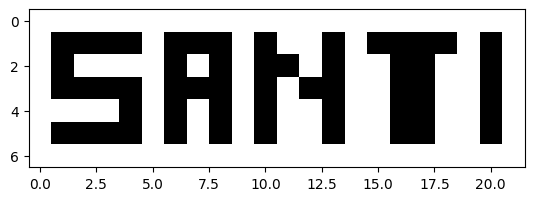

In [37]:
plt.imshow(np_img1, cmap='gray')

Firma Esteban

In [38]:
np_img2 = np.array(img_2)
np_img2.shape

(7, 16, 3)

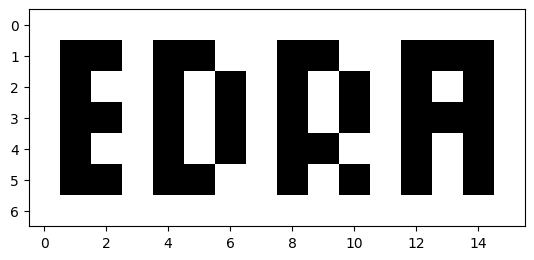

In [39]:
plt.imshow(np_img2, cmap='gray')

Firma Daniel

In [40]:
np_img3 = np.array(img_3)
np_img3.shape

(6, 16, 3)

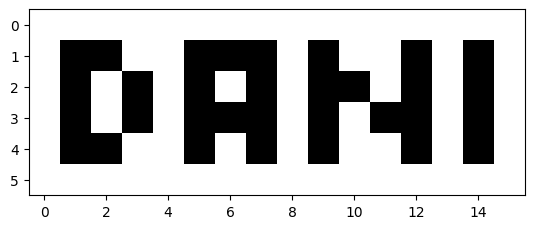

In [41]:
plt.imshow(np_img3, cmap='gray')

Paisaje

In [42]:
np_img4 = np.array(img_4)
np_img4.shape

(12, 19, 3)

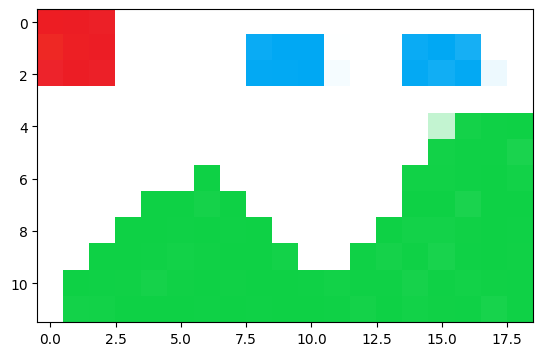

In [43]:
plt.imshow(np_img4, cmap='gray')

Creacion de la carpeta para guardar las animaciones

In [44]:
carpeta = r"C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatrones\\animaciones"

# Verificar si la carpeta ya existe
if not os.path.exists(carpeta):
    # Si no existe, la creamos
    os.mkdir(carpeta)

# Pruebas

## Primer experimento

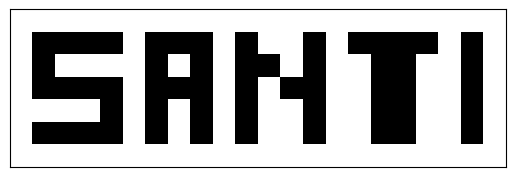

In [45]:
matrizExp1, arrayExp1 = obt_array_matrix(img_1)
plt.imshow(matrizExp1, cmap='binary')
plt.xticks([])
plt.yticks([])
plt.show()

In [46]:
def fitness(cromosoma):
    return len(cromosoma) - hamming_distance(arrayExp1, cromosoma)

In [47]:
poblacion_inicial = pob_init(arrayExp1)

In [48]:
exp1 = AlgGenetico( poblacion_inicial, num_generaciones=100, seleccion="ranking", cruce="uniforme", mutacion="flit_bit")
exp1.desarrollo_generaciones()

KeyboardInterrupt: 

In [ ]:
print("Analisis Estadistico\n")
exp1.analisis_est()

Analisis Estadistico

Media: 153.88833333333332
Mediana: 154.0
Mínimo: 152
Máximo: 154
Desviación estándar: 0.3202039280763988
Varianza: 0.10253055555555557


Diagramas



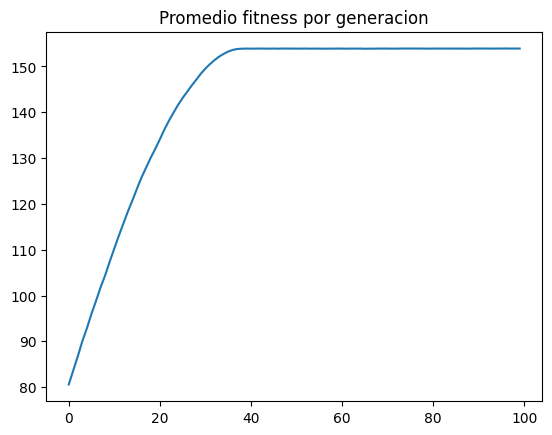

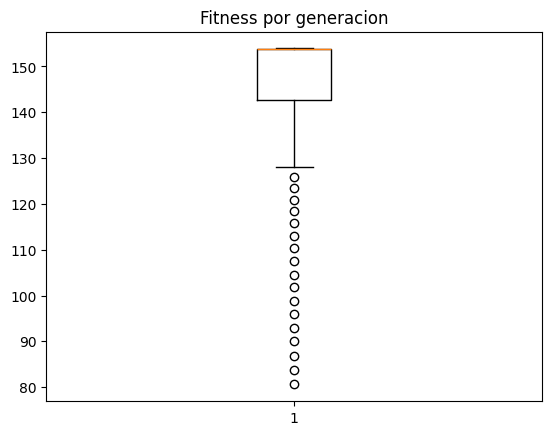

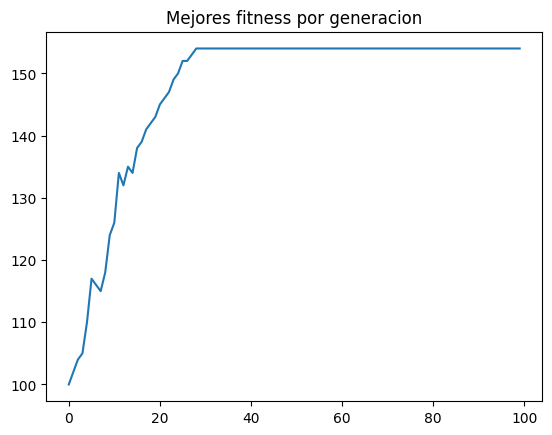

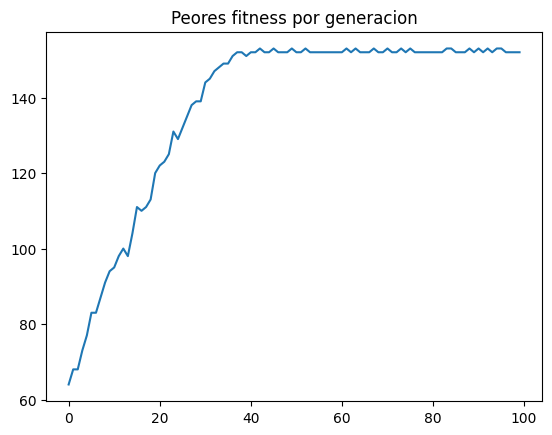

In [ ]:
print("Diagramas\n")
exp1.diagramas()

Resultado Final



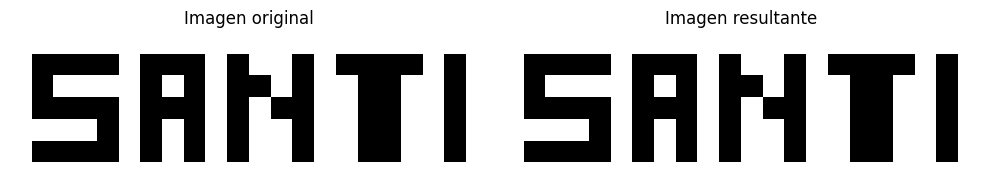

In [ ]:
print("Resultado Final\n")

plt.figure(figsize=(10, 6))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(img_1, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

imgResultExp1 = obtener_el_mejor(exp1, matrizExp1)
# Imagen resultante
plt.subplot(1, 2, 2)
plt.imshow(imgResultExp1, cmap='binary')
plt.title('Imagen resultante')
plt.axis('off')

plt.tight_layout()
plt.show()

### Animacion

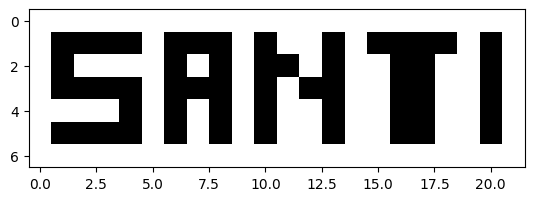

In [ ]:
ani1 = animation_result(matrizExp1, exp1, 100)
ani1.save('C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatrones\\animaciones\\aniFirmaSantiago.gif', writer='pillow')

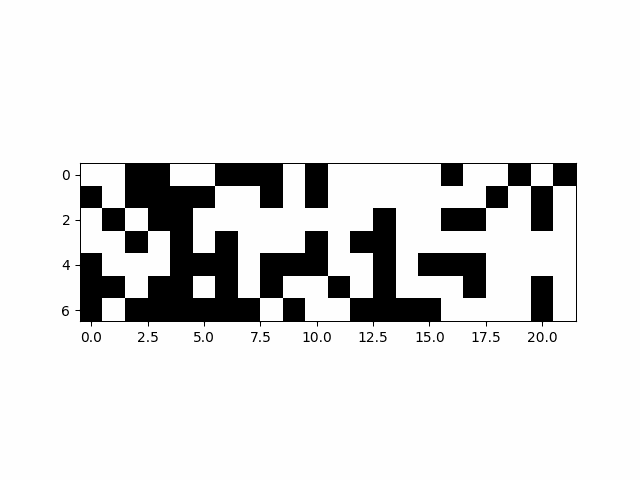

In [ ]:
display.display(display.Image(filename="C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatrones\\animaciones\\aniFirmaSantiago.gif"))

## Segundo experimento

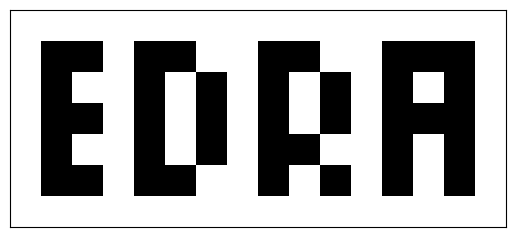

In [ ]:
matrizExp2, arrayExp2 = obt_array_matrix(img_2)
plt.imshow(matrizExp2, cmap='binary')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
def fitness(cromosoma):
    return len(cromosoma) - hamming_distance(arrayExp2, cromosoma)

In [ ]:
poblacion_inicial = pob_init(arrayExp2)

In [ ]:
exp2 = AlgGenetico( poblacion_inicial, num_generaciones=100, seleccion="ranking", cruce="uniforme", mutacion="flit_bit")
exp2.desarrollo_generaciones()

In [ ]:
print("Analisis Estadistico\n")
exp2.analisis_est()

Analisis Estadistico

Media: 111.90333333333334
Mediana: 112.0
Mínimo: 110
Máximo: 112
Desviación estándar: 0.2983100549577384
Varianza: 0.08898888888888888


Diagramas



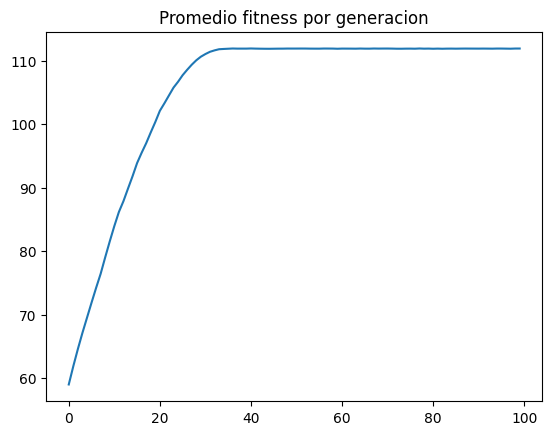

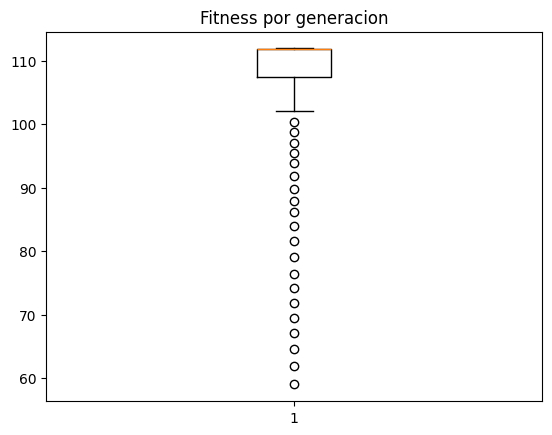

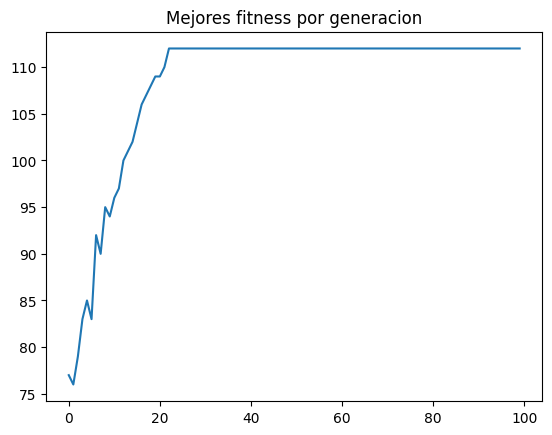

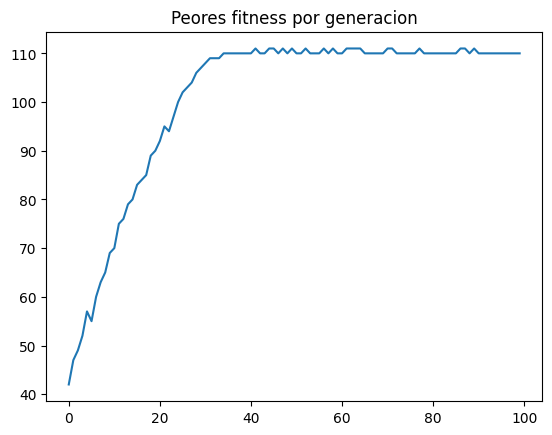

In [ ]:
print("Diagramas\n")
exp2.diagramas()

Resultado Final



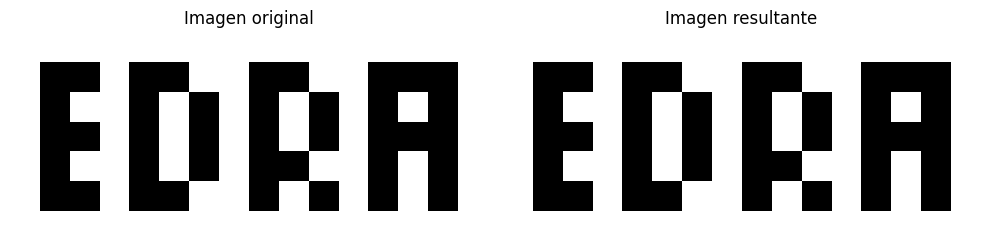

In [ ]:
print("Resultado Final\n")

plt.figure(figsize=(10, 6))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(img_2, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

imgResultExp2 = obtener_el_mejor(exp2, matrizExp2)
# Imagen resultante
plt.subplot(1, 2, 2)
plt.imshow(imgResultExp2, cmap='binary')
plt.title('Imagen resultante')
plt.axis('off')

plt.tight_layout()
plt.show()

### Animacion

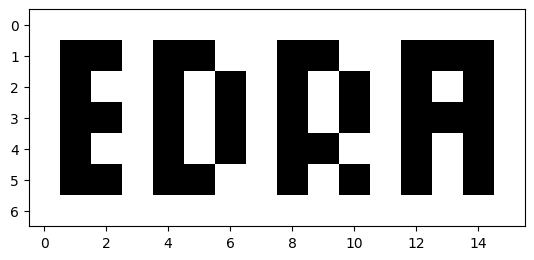

In [ ]:
ani2 = animation_result(matrizExp2, exp2, 100)
ani2.save('C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatrones\\animaciones\\aniFirmaEsteban.gif', writer='pillow')

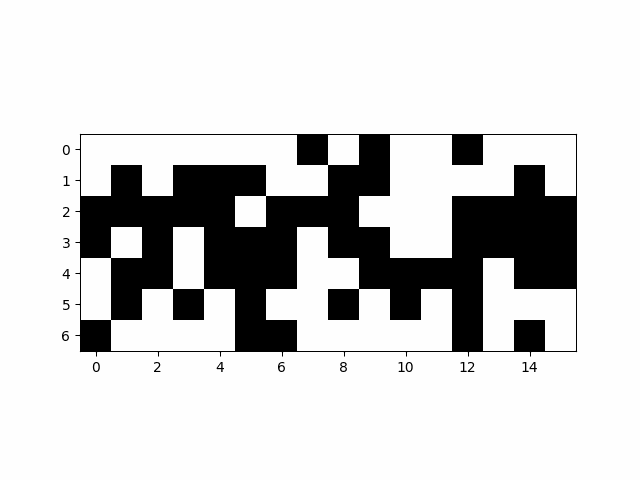

In [ ]:
#HTML(ani2.to_jshtml())
display.display(display.Image(filename="C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatrones\\animaciones\\aniFirmaEsteban.gif"))

## Tercer expermiento

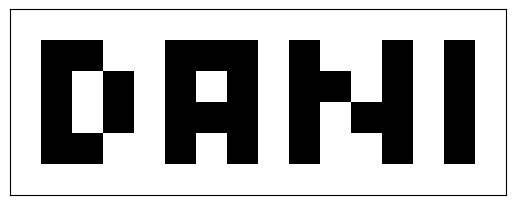

In [ ]:
matrizExp3, arrayExp3 = obt_array_matrix(img_3)
plt.imshow(matrizExp3, cmap='binary')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
def fitness(cromosoma):
    return len(cromosoma) - hamming_distance(arrayExp3, cromosoma)

In [ ]:
poblacion_inicial = pob_init(arrayExp3)

In [ ]:
exp3 = AlgGenetico( poblacion_inicial, num_generaciones=100, seleccion="ranking", cruce="uniforme", mutacion="flit_bit")
exp3.desarrollo_generaciones()

In [ ]:
print("Analisis Estadistico\n")
exp3.analisis_est()

Analisis Estadistico

Media: 95.895
Mediana: 96.0
Mínimo: 94
Máximo: 96
Desviación estándar: 0.3119428366437244
Varianza: 0.09730833333333334


Diagramas



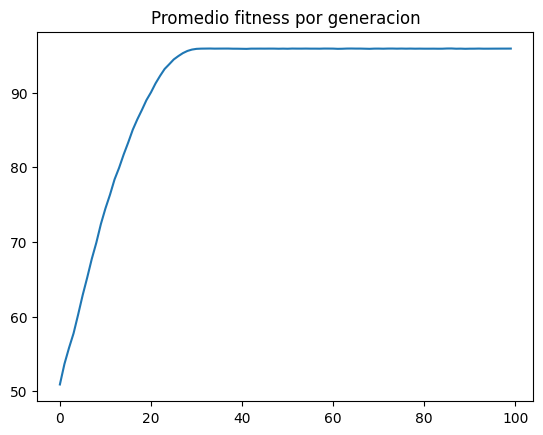

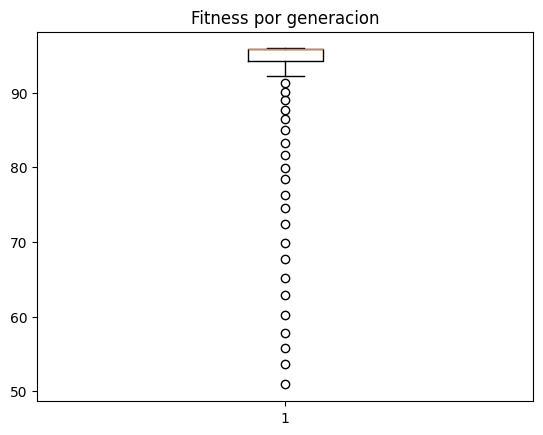

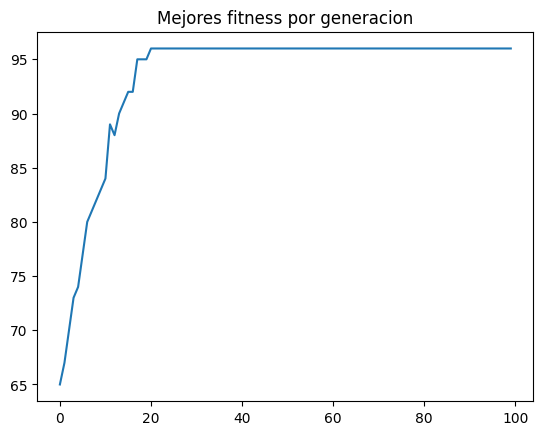

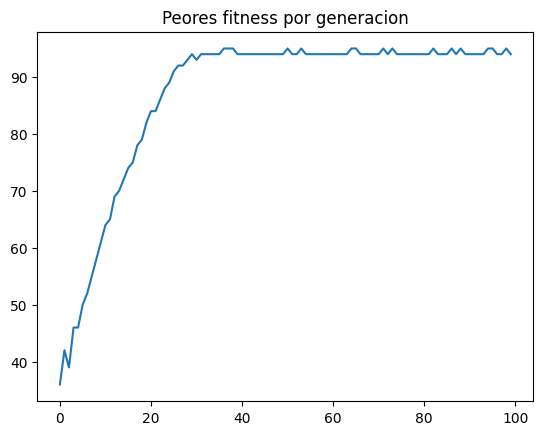

In [ ]:
print("Diagramas\n")
exp3.diagramas()

Resultado Final



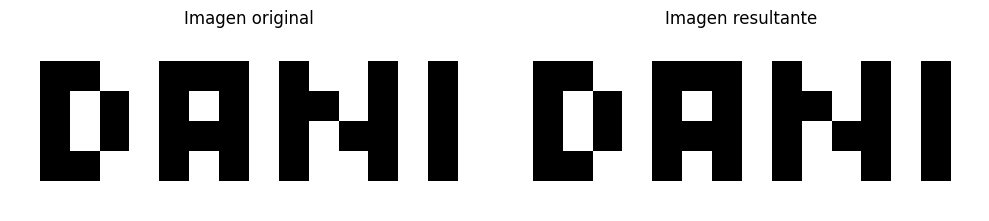

In [ ]:
print("Resultado Final\n")

plt.figure(figsize=(10, 6))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(img_3, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

imgResultExp3 = obtener_el_mejor(exp3, matrizExp3)
# Imagen resultante
plt.subplot(1, 2, 2)
plt.imshow(imgResultExp3, cmap='binary')
plt.title('Imagen resultante')
plt.axis('off')

plt.tight_layout()
plt.show()

### Animacion

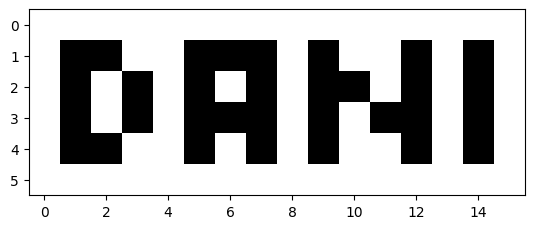

In [ ]:
ani3 = animation_result(matrizExp3, exp3, 100)
ani3.save('C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatrones\\animaciones\\aniFirmaDaniel.gif', writer='pillow')

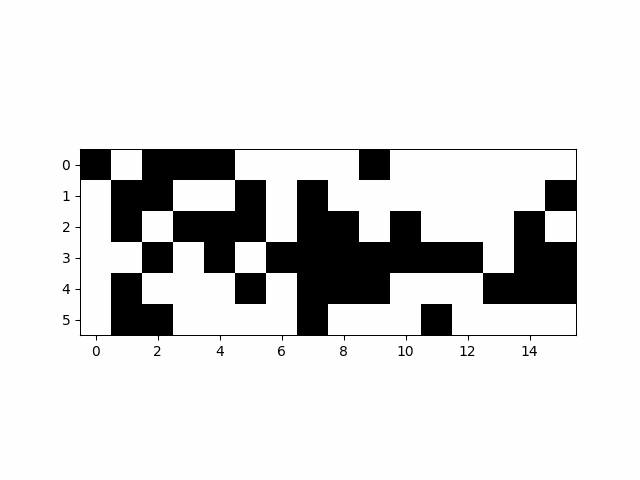

In [ ]:
#HTML(ani3.to_jshtml())
display.display(display.Image(filename="C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatrones\\animaciones\\aniFirmaDaniel.gif"))

## Cuarto Experimento

In [49]:
factor = 25
matrizExp4 = np.array(img_4)
arrayExp4 = matrizExp4.flatten() / factor

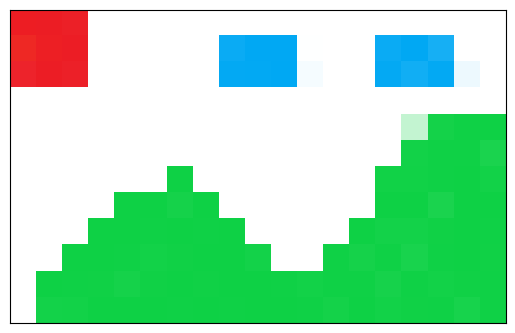

In [50]:
plt.imshow(matrizExp4, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [51]:
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))

In [52]:
def fitness(cromosoma):
    return len(cromosoma) - euclidean_distance(arrayExp4, cromosoma)

In [53]:
#poblacion_inicial = [individuo(desordenar_valores_imagen(arrayExp4), fitness) for _ in range(1000)]
poblacion_inicial = pob_init_color(arrayExp4)

In [54]:
exp4 = AlgGenetico( poblacion_inicial, num_generaciones=200, seleccion="ranking", cruce="uniforme", mutacion="flit_bit", prob_cruce=0.97)
exp4.desarrollo_generaciones()

In [55]:
print("Analisis Estadistico\n")
exp4.analisis_est()

Analisis Estadistico

Media: 673.1708926365001
Mediana: 673.4545554858981
Mínimo: 669.30447687219
Máximo: 673.5046677041648
Desviación estándar: 1.0049156303285363
Varianza: 1.0098554240785993


Diagramas



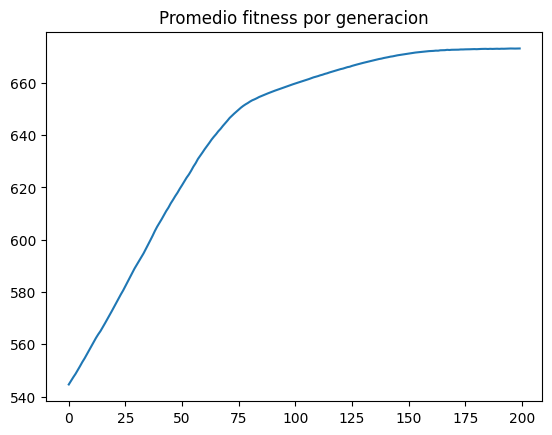

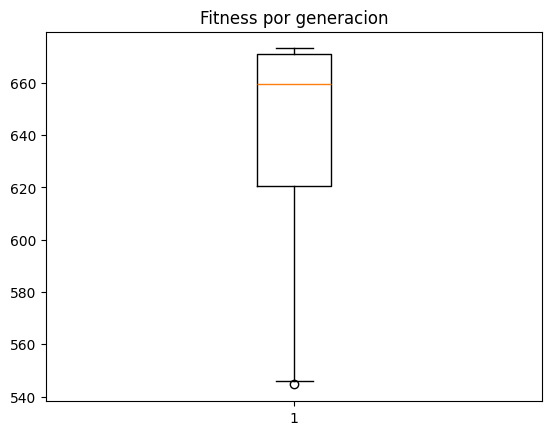

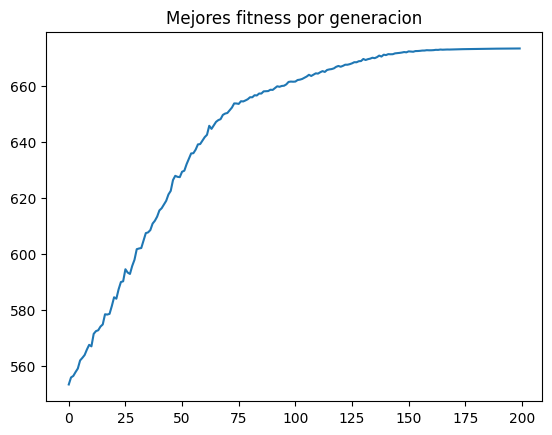

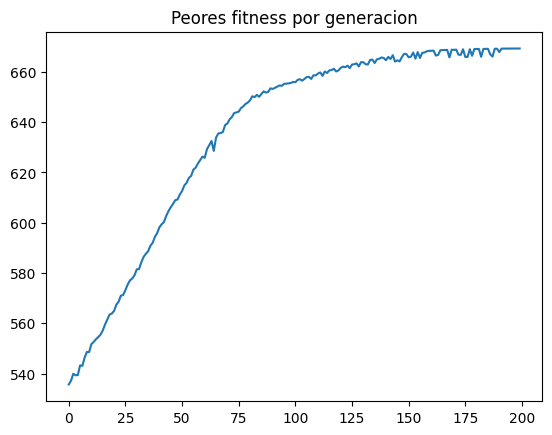

In [56]:
print("Diagramas\n")
exp4.diagramas()

Resultado Final

12


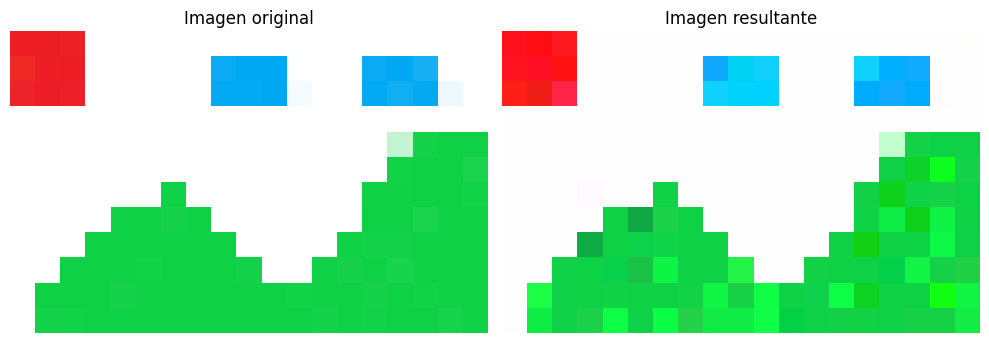

In [57]:
print("Resultado Final\n")

plt.figure(figsize=(10, 6))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(img_4, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

imgResultExp4 = obtener_el_mejor(exp4, matrizExp4)
#normalized_image = imgResultExp4 / 255.0
normalized_image = (imgResultExp4 * factor) / 255.0

# Imagen resultante
plt.subplot(1, 2, 2)
plt.imshow(normalized_image, cmap='binary')
plt.title('Imagen resultante')
plt.axis('off')

plt.tight_layout()
plt.show()

### Animacion

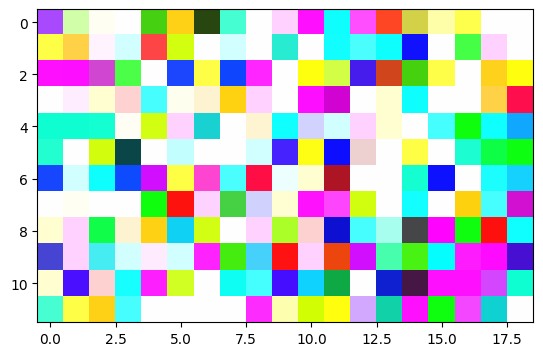

In [58]:
ani4 = animation_result_color(matrizExp4, exp4, 200, factor)

In [59]:
ani4.save('C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatrones\\animaciones\\aniPaisaje.gif', writer='pillow')

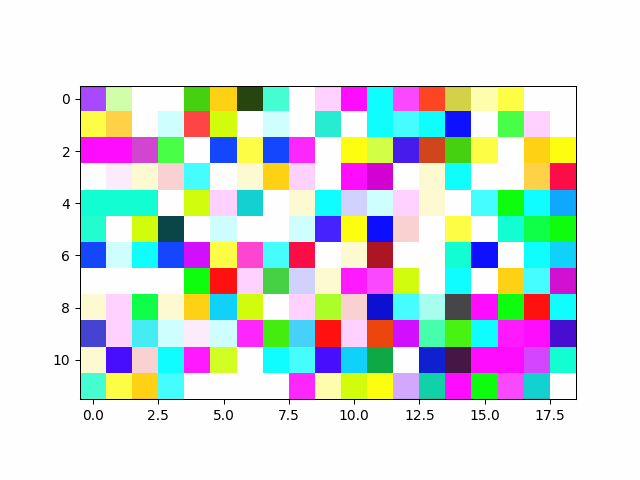

In [60]:
#HTML(ani4.to_jshtml())
display.display(display.Image(filename="C:\\Users\\danieeeel\\Documents\\Python_proyectos\\tallerPatrones\\animaciones\\aniPaisaje.gif"))